## Model Development / Evaluation 

In [198]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn <- our machine learning library. We'll need LinearRegression and the metrics module
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso

In [199]:
#Read in datasets

In [200]:
train = pd.read_csv('../datasets/train_modified.csv')
test = pd.read_csv('../datasets/test_modified.csv')

In [201]:
# HELPS YOU SEE ALL COLUMNS IN A DF
pd.set_option('display.max_rows', 500)

In [202]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,138500


In [203]:
price_mean = train['SalePrice'].mean()
price_mean

181469.70160897123

In [204]:
price_median = train['SalePrice'].median()
price_median

162500.0

In [205]:
train.sort_values('SalePrice').min()

Id                         1
PID                526301100
MS SubClass               20
MS Zoning            A (agr)
Lot Frontage            21.0
Lot Area                1300
Street                  Grvl
Alley                   Grvl
Lot Shape                IR1
Land Contour             Bnk
Utilities             AllPub
Lot Config            Corner
Land Slope               Gtl
Neighborhood         Blmngtn
Condition 1           Artery
Condition 2           Artery
Bldg Type               1Fam
House Style           1.5Fin
Overall Qual               1
Overall Cond               1
Year Built              1872
Year Remod/Add          1950
Roof Style              Flat
Roof Matl            ClyTile
Exterior 1st         AsbShng
Exterior 2nd         AsbShng
Mas Vnr Type          BrkCmn
Mas Vnr Area             0.0
Exter Qual                Ex
Exter Cond                Ex
Foundation            BrkTil
Bsmt Qual                 Ex
Bsmt Cond                 Ex
Bsmt Exposure             Av
BsmtFin Type 1

In [206]:
train.sort_values('Yr Sold')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
707,2749,906223180,60,RL,80.0000,9554,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,9,2006,WD,215000
340,2624,535453160,20,RL,70.0000,7560,Pave,Grvl,Reg,Lvl,...,0,0,Gd,GdWo,Shed,0,7,2006,WD,133700
1544,2914,923226180,180,RM,21.0000,1470,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2006,WD,73000
583,2906,923203090,120,RM,32.0000,4500,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,5,2006,WD,164000
584,2878,910226060,50,RM,75.0000,9060,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2006,WD,139000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,272,907410080,20,RL,70.0000,8400,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,5,2010,WD,213000
1090,209,904100140,70,RL,69.0552,24090,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,6,2010,COD,244400
1080,1,526301100,20,RL,141.0000,31770,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,5,2010,WD,215000
1332,192,903204040,50,RM,53.0000,5830,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,128500


In [207]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,Grvl,IR1,Lvl,...,0,185,0,Ex,MnPrv,Shed,0,7,2009,WD


In [208]:
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650246
Garage Cars        0.648197
Total Bsmt SF      0.628668
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.516738
Mas Vnr Area       0.508602
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423346
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.325850
Lot Area           0.296566
Bsmt Full Bath     0.283429
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190132
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016249
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

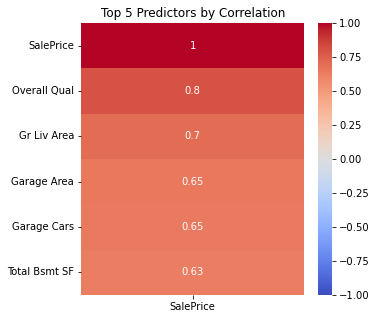

In [209]:
plt.figure(figsize=[5,5])
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice',key =abs,ascending=False)[:6],vmin=-1.0,vmax=1.0,annot=True,cmap= 'coolwarm')
plt.title('Top 5 Predictors by Correlation')
plt.savefig('../Images/heatmap_Top5.jpeg')

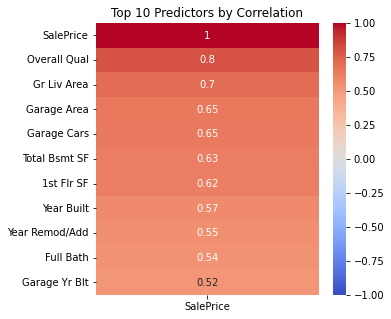

In [210]:
plt.figure(figsize=[5,5])
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice',key =abs,ascending=False)[:11],vmin=-1,vmax=1,annot=True,cmap= 'coolwarm')
plt.title('Top 10 Predictors by Correlation')
plt.savefig('../Images/heatmap_Top10.jpeg')

In [211]:
# another way to join df to dummy data
dummy_df = pd.get_dummies(data=train)

In [212]:
dummy_df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [213]:
# Correlations can only be done on train dataset
corr_matrix = dummy_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice               1.000000
Overall Qual            0.800207
Gr Liv Area             0.697038
Garage Area             0.650246
Garage Cars             0.648197
Total Bsmt SF           0.628668
1st Flr SF              0.618486
Bsmt Qual_Ex            0.586497
Year Built              0.571849
Kitchen Qual_Ex         0.551284
Year Remod/Add          0.550370
Full Bath               0.537969
Foundation_PConc        0.529047
Garage Yr Blt           0.516738
Mas Vnr Area            0.508602
TotRms AbvGrd           0.504014
Exter Qual_Ex           0.493861
Fireplaces              0.471093
Heating QC_Ex           0.453255
Neighborhood_NridgHt    0.448647
Exter Qual_Gd           0.446685
BsmtFin SF 1            0.423346
Garage Finish_Fin       0.422936
BsmtFin Type 1_GLQ      0.398661
Bsmt Exposure_Gd        0.377032
Sale Type_New           0.358102
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Open Porch SF           0.333476
Wood Deck SF            0.326490
Lot Fronta

In [214]:
#train[train['Neighborhood'].str.contains("'")]

In [215]:
#train['Neighborhood'] = train['Neighborhood'].str.replace(' _ ' , "'")

In [216]:
dummy_df.shape

(2051, 292)

## Model # 1(Predictions based on Train Dataset)

In [272]:
#X = train.drop('SalePrice', axis=1)
xvars = ['Overall Qual',
         'Gr Liv Area', 
         'Garage Area', 
         'Garage Cars',
         'Total Bsmt SF',
         '1st Flr SF',
         'Year Built',
         'Year Remod/Add',
         'Full Bath',
         'TotRms AbvGrd', 
         'Mas Vnr Area',
         'Fireplaces',
         'BsmtFin SF 1',
         'Open Porch SF',
         'Wood Deck SF', 
         'Lot Area',
         'Bsmt Full Bath',
         'Half Bath', 
         'Garage Yr Blt', 
         '2nd Flr SF', 
         'Bsmt Unf SF', 
         'Lot Frontage', 
         'Bedroom AbvGr', 
         'Screen Porch',
         'TotRms AbvGrd',
         'Fireplaces',
         
         
]

X = dummy_df[xvars]
y = dummy_df['SalePrice']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [274]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [275]:
# Train score
lr.score(X_train, y_train)

0.817824570107003

In [276]:
# Test score
lr.score(X_test, y_test)

0.8180943210146946

In [277]:
# this is what will be submitted to kaggle
preds = lr.predict(dummy_test[xvars])
#preds

In [278]:
dummy_test['SalePrice'] = preds

In [279]:
lr_submission = dummy_test[['Id', 'SalePrice']]

In [280]:
lr_submission.head()

,Id,SalePrice
0,2658,143612.088424
1,2718,172721.251455
2,2414,217620.640358
3,1989,116703.027590
4,625,201767.212583


In [226]:
lr_submission.set_index('Id', inplace = True)

In [227]:
#save submission

lr_submission.to_csv('v3_dummy_submission.csv')

## Model #2 (Test Dataset)
This model geenerates misleading results becasue it is now shifted from predicting the true sales price to predicting what the model will do, as per discussion with Tan

In [228]:
# another way to join df to dummy data, ## do exact same steps with Test.csv incl get dummyies
dummy_test = pd.get_dummies(data=test)


In [229]:
dummy_test.shape

(878, 272)

In [230]:
dummy_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.545961,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.545961,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [265]:
xvars = ['Overall Qual',
         'Gr Liv Area', 
         'Garage Area', 
         'Garage Cars',
         'Total Bsmt SF',
         '1st Flr SF',
         'Year Built',
         'Year Remod/Add',
         'Full Bath',
         'TotRms AbvGrd', 
         'Mas Vnr Area',
         'Fireplaces',
         'BsmtFin SF 1',
         'Open Porch SF',
         'Wood Deck SF', 
         'Lot Area',
         'Bsmt Full Bath',
         'Half Bath', 
         'Garage Yr Blt', 
         '2nd Flr SF', 
         'Bsmt Unf SF', 
         'Lot Frontage', 
         'Bedroom AbvGr', 
         'Screen Porch',
         'TotRms AbvGrd',
         'Fireplaces',
         'Sale Type_New',
         'Bsmt Qual_TA',      
         'Garage Finish_Unf',
         'Kitchen Qual_TA',
         'Sale Type_CWD',
         'Sale Type_Con',
         'Sale Type_ConLD',
         'Sale Type_ConLI',
         'Sale Type_ConLw',
         'Sale Type_Oth',
         'Sale Type_VWD'
            
         
        
]

X = dummy_test[xvars]
y = dummy_test['SalePrice']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [233]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [234]:
# Train score
lr.score(X_train, y_train)

0.8339705763573879

In [235]:
# Test score
lr.score(X_test, y_test)

0.8161311159939342

In [266]:
# this is what will be submitted to kaggle
preds = lr.predict(dummy_test[xvars])
#preds

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 2nd Flr SF
- Bedroom AbvGr
- Bsmt Full Bath
- Bsmt Unf SF
- BsmtFin SF 1
- ...
Feature names seen at fit time, yet now missing:
- Bsmt Qual_Ex
- Exter Qual_TA
- Foundation_PConc
- Kitchen Qual_Ex

  warnings.warn(message, FutureWarning)


ValueError: X has 37 features, but LinearRegression is expecting 19 features as input.

In [237]:
dummy_test['SalePrice'] = preds

In [238]:
lr_submission = dummy_test[['Id', 'SalePrice']]

In [239]:
lr_submission.head()

,Id,SalePrice
0,2658,150952.762836
1,2718,172858.854344
2,2414,218263.622490
3,1989,111134.885136
4,625,199313.205729


In [240]:
lr_submission.set_index('Id', inplace = True)

In [241]:
#save submission

lr_submission.to_csv('v5_dummy_submission.csv')

## Model # 3 - All Highly Correlated Variables

In [242]:
xvars

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces',
 'BsmtFin SF 1',
 'Open Porch SF',
 'Wood Deck SF',
 'Lot Area',
 'Bsmt Full Bath',
 'Half Bath',
 'Garage Yr Blt',
 '2nd Flr SF',
 'Bsmt Unf SF',
 'Lot Frontage',
 'Bedroom AbvGr',
 'Screen Porch',
 'TotRms AbvGrd',
 'Fireplaces',
 'Sale Type_New',
 'Bsmt Qual_TA',
 'Garage Finish_Unf',
 'Kitchen Qual_TA',
 'Sale Type_CWD',
 'Sale Type_Con',
 'Sale Type_ConLD',
 'Sale Type_ConLI',
 'Sale Type_ConLw',
 'Sale Type_Oth',
 'Sale Type_VWD']

In [243]:
## Help from Katie S
col_list = dummy_df.columns

high_corr = []
for col in col_list:
    if dummy_df[col].corr(dummy_df['SalePrice']) > 0.5 or dummy_df[col].corr(dummy_df['SalePrice']) < -0.5:
        high_corr.append(col)
print(high_corr)

['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice', 'Exter Qual_TA', 'Foundation_PConc', 'Bsmt Qual_Ex', 'Bsmt Qual_TA', 'Kitchen Qual_Ex', 'Kitchen Qual_TA', 'Garage Finish_Unf']


In [244]:
high_corr.remove('SalePrice')

In [245]:
xvars = high_corr

X = dummy_df[xvars]
y = dummy_df['SalePrice']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [247]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [248]:
# Train score
lr.score(X_train, y_train)

0.8352267508294431

In [249]:
# Test score
lr.score(X_test, y_test)

0.821123456849235

In [250]:
# this is what will be submitted to kaggle
preds = lr.predict(dummy_test[xvars])
#preds

In [251]:
dummy_test['SalePrice'] = preds

In [252]:
lr_submission = dummy_test[['Id', 'SalePrice']]

In [253]:
lr_submission.head()

,Id,SalePrice
0,2658,160376.746143
1,2718,196020.029726
2,2414,196645.200660
3,1989,129976.377910
4,625,178390.963741


In [254]:
lr_submission.set_index('Id', inplace = True)

In [255]:
#save submission

lr_submission.to_csv('v4_dummy_submission.csv')

## Model 4 Lasso Regression

In [256]:
#Lasso Model (Regularization Lesson)

xvars = high_corr

X = dummy_df[xvars]
y = dummy_df['SalePrice']

#Instantiate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)


#Fit and transform X data

X_overfit = poly.fit_transform(X)



In [257]:
poly.get_feature_names(X.columns)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Exter Qual_TA',
 'Foundation_PConc',
 'Bsmt Qual_Ex',
 'Bsmt Qual_TA',
 'Kitchen Qual_Ex',
 'Kitchen Qual_TA',
 'Garage Finish_Unf',
 'Overall Qual^2',
 'Overall Qual Year Built',
 'Overall Qual Year Remod/Add',
 'Overall Qual Mas Vnr Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual 1st Flr SF',
 'Overall Qual Gr Liv Area',
 'Overall Qual Full Bath',
 'Overall Qual TotRms AbvGrd',
 'Overall Qual Garage Yr Blt',
 'Overall Qual Garage Cars',
 'Overall Qual Garage Area',
 'Overall Qual Exter Qual_TA',
 'Overall Qual Foundation_PConc',
 'Overall Qual Bsmt Qual_Ex',
 'Overall Qual Bsmt Qual_TA',
 'Overall Qual Kitchen Qual_Ex',
 'Overall Qual Kitchen Qual_TA',
 'Overall Qual Garage Finish_Unf',
 'Year Built^2',
 'Year Built Year Remod/Add',
 'Year Built Mas Vnr Area',
 'Year Built Total Bs

In [258]:
# Check dimensions of X_overfit
X_overfit.shape

(2051, 209)

In [259]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.70,
    random_state=2022


)

In [260]:
#Scale data & Relabel
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [261]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (615, 209)
y_train shape is: (615,)
Z_test shape is: (1436, 209)
y_test shape is: (1436,)


In [262]:
#Received help from Tan
# Standardize predictors
lasso = Lasso(alpha=100, max_iter=10000)
lasso.fit(Z_train, y_train)

Lasso(alpha=100, max_iter=10000)

In [263]:
#How does the model score on the training and test data?

print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.9228432155252597
0.8575940709866966


In [168]:
#display_R2_scores(lasso, Z_train, y_train, Z_test, y_test)
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The number of features in this model is : 78.


In [271]:
lasso.coef_

array([    -0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,  -1185.04097865,
            0.        ,  -3330.55809841,      0.        ,      0.        ,
            0.        ,     -0.        ,     -0.        ,      0.        ,
            0.        ,      0.        ,     -0.        ,  -9637.27605747,
           -0.        ,     -0.        ,  -1187.07493923,  33926.87458954,
            0.        ,   6530.78357431,     -0.        ,   5267.67649099,
           -0.        ,      0.        ,   7383.14798828,      0.        ,
           -0.        ,     -0.        ,      0.        ,     -0.        ,
         8877.38900148,   6750.29094294,      0.        ,  11570.79613166,
            0.        ,      0.        ,      0.        ,  35330.95261908,
           -0.        ,      0.        ,      0.        ,     -0.        ,
            0.        ,      0.        ,     -0.        ,     -0.        ,
         9155.91955928,  

## Model 5 Ridge Regression

In [122]:
#Required Ridge Model 
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9225866864637838
0.8612464628134358
